In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
include_columns = [0, 1, 2, 3, 7, 10, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23] 
movies = pd.read_csv('Datafiles\\movies_metadata.csv', sep = ',', low_memory=False, \
        usecols = include_columns)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   popularity             45461 non-null  object 
 6   production_companies   45463 non-null  object 
 7   production_countries   45463 non-null  object 
 8   release_date           45379 non-null  object 
 9   revenue                45460 non-null  float64
 10  runtime                45203 non-null  float64
 11  status                 45379 non-null  object 
 12  title                  45460 non-null  object 
 13  video                  45460 non-null  object 
 14  vote_average           45460 non-null  float64
 15  vo

1. Data filtering

In [457]:
f_movies = movies[movies['adult'] == 'False']
f_movies = f_movies[f_movies['status'] == 'Released']
f_movies = f_movies[f_movies['video'] == False]

In [458]:
f_movies = f_movies.drop(['adult', 'status', 'video'], axis=1)

2. Data wrangling
BELONGS TO COLLECTION

In [459]:
f_movies.loc[f_movies['belongs_to_collection'].notna(), 'belongs_to_collection'] = 1
f_movies.loc[f_movies['belongs_to_collection'].isna(), 'belongs_to_collection'] = 0


In [460]:
f_movies['belongs_to_collection'] = f_movies['belongs_to_collection'].astype(int)
f_movies['belongs_to_collection'].value_counts()
#f_movies['belongs_to_collection'].dtype


0    40451
1     4462
Name: belongs_to_collection, dtype: int64

(array([7.348e+03, 9.280e+02, 2.980e+02, 1.630e+02, 6.400e+01, 3.500e+01,
        1.900e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.80000009e+07, 7.60000008e+07, 1.14000001e+08,
        1.52000001e+08, 1.90000000e+08, 2.28000000e+08, 2.66000000e+08,
        3.04000000e+08, 3.42000000e+08, 3.80000000e+08]),
 <BarContainer object of 10 artists>)

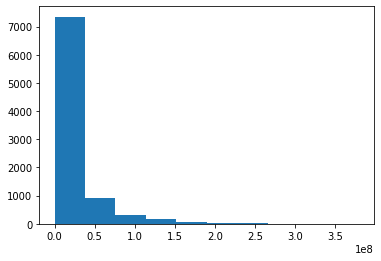

In [461]:
f_movies['budget'] = f_movies['budget'].astype(int)
f_movies['budget'].value_counts()
#plt.hist(f_movies['budget'])
budget_nonzero = f_movies[f_movies['budget'] != 0]['budget']
plt.hist(budget_nonzero)

{'whiskers': [<matplotlib.lines.Line2D at 0x196e3f61e50>,
 'caps': [<matplotlib.lines.Line2D at 0x196eb7a65b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196e3f61ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x196eb7a6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196eb7b10a0>],
 'means': []}

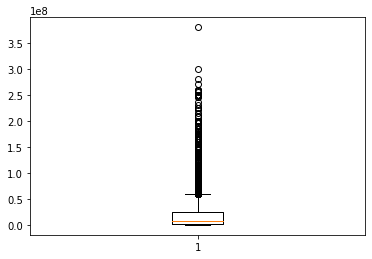

In [462]:
plt.boxplot(budget_nonzero)
#budget_nonzero

In [463]:
f_movies['original_language'] = f_movies['original_language'].astype(str)
lang = f_movies['original_language'].value_counts()
lang_other = lang[lang <= 100]
f_movies.loc[f_movies['original_language'].isin(lang_other.index.to_list()), 'original_language'] = 'other_language'
f_movies['original_language'].value_counts()


en                31869
fr                 2417
it                 1509
ja                 1340
other_language     1097
de                 1073
es                  982
ru                  818
hi                  501
ko                  441
zh                  406
sv                  383
pt                  314
cn                  308
fi                  289
nl                  244
da                  223
pl                  213
tr                  141
cs                  128
el                  111
no                  106
Name: original_language, dtype: int64

In [464]:
f_movies['popularity'] = f_movies['popularity'].astype(float)
#plt.hist(f_movies['popularity'])
#f_movies['popularity'].describe()
#f_movies['popularity'].sort_values(ascending=False).head(20)
f_movies[f_movies['popularity'] > 200].sort_values(by='popularity', ascending = False)
pop = f_movies['popularity']


def normalizer(vect, a, b):
    min_vect = min(vect)
    max_vect = max(vect)
    result = ((b - a)*(vect - min_vect)/(max_vect-min_vect)) + a
    return result

pop_stand = normalizer(pop, 0, 100)
pop_stand.describe()
#plt.hist(pop_stand)

count    44913.000000
mean         0.537663
std          1.101190
min          0.000000
25%          0.071748
50%          0.207965
75%          0.683359
max        100.000000
Name: popularity, dtype: float64

RELEASE DATE

(array([6.0000e+00, 1.0000e+02, 1.7900e+02, 6.6300e+02, 2.0060e+03,
        2.6860e+03, 4.4010e+03, 5.1130e+03, 8.5430e+03, 2.1142e+04]),
 array([1874. , 1888.3, 1902.6, 1916.9, 1931.2, 1945.5, 1959.8, 1974.1,
        1988.4, 2002.7, 2017. ]),
 <BarContainer object of 10 artists>)

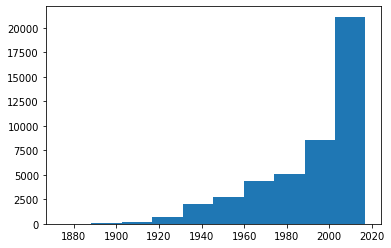

In [465]:
f_movies['release_date'] = f_movies['release_date'].astype(str)
f_movies.loc[f_movies['release_date'] == 'nan', 'release_date'] = '0000'
f_movies['release_date'] = f_movies['release_date'].str[:4]

f_movies['release_date'] = pd.to_numeric(f_movies['release_date'])

plt.hist(f_movies[f_movies['release_date'] != 0]['release_date'])


REVENUE

(array([6.953e+03, 2.990e+02, 8.700e+01, 4.000e+01, 9.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 2.78796510e+08, 5.57593018e+08, 8.36389527e+08,
        1.11518604e+09, 1.39398254e+09, 1.67277905e+09, 1.95157556e+09,
        2.23037207e+09, 2.50916858e+09, 2.78796509e+09]),
 <BarContainer object of 10 artists>)

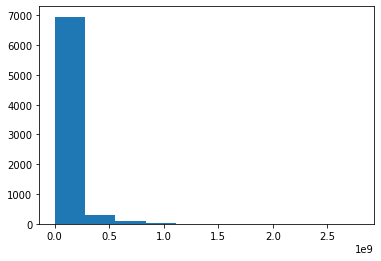

In [466]:
f_movies['revenue'].value_counts()
plt.hist(f_movies[f_movies['revenue'] != 0]['revenue'])

{'whiskers': [<matplotlib.lines.Line2D at 0x196ea51da90>,
 'caps': [<matplotlib.lines.Line2D at 0x196ea4f30d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196ea51d700>],
 'medians': [<matplotlib.lines.Line2D at 0x196ea4f37f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x196ea4f3b80>],
 'means': []}

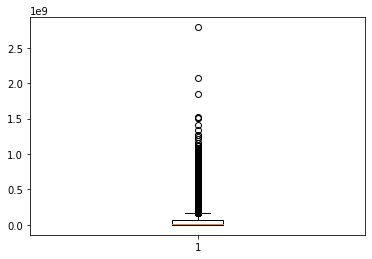

In [467]:
plt.boxplot(f_movies[f_movies['revenue'] != 0]['revenue'])

RUNTIME

In [468]:
f_movies['runtime'].value_counts()
f_movies['runtime'].describe()

#plt.hist(f_movies[f_movies['runtime'] != 0]['runtime'])
f_movies['runtime'].sort_values(ascending=False).head(200)


24178    1256.0
40938    1140.0
19965    1140.0
13767     931.0
13953     925.0
          ...  
44763     240.0
21184     240.0
18903     240.0
44995     240.0
20783     240.0
Name: runtime, Length: 200, dtype: float64

In [469]:
f_movies['vote_count'].value_counts()
f_movies['vote_average'].value_counts()

0.0    2913
6.0    2432
5.0    1980
7.0    1863
6.5    1707
       ... 
9.4       3
1.1       1
9.8       1
0.7       1
9.6       1
Name: vote_average, Length: 92, dtype: int64

In [470]:

import json
"""
converts from string to dictionary and extracts values from particulary key
"""
final_list = []
idx = 0
for row in f_movies['genres']:
    if row == '[]':
        final_list.append(['unknown_genre'])
    else:
        final_values = []
        row = row.strip('[]').replace("'", "\"")
        for i in range(len(row)):
            if row[i] == ',':
                if row[i-1] != '}':
                    pass
                else:
                    row = row[:i] + '@' + row[i + 1:]
        row = row.replace(" ", "").split('@')
        # print(idx)
        # print(row)
        idx += 1
        for item in row: #for each dictionary in a row
            tmp = json.loads(item) #load that dict
            final_values.append(tmp['name']) #extract value
        final_list.append(final_values)
f_movies['genres'] = final_list

In [471]:
import itertools
np.unique([*itertools.chain.from_iterable(f_movies.genres)])
# f_movies.shape

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction',
       'TVMovie', 'Thriller', 'War', 'Western', 'unknown_genre'],
      dtype='<U14')

In [472]:
s = f_movies['genres'].explode()
f_movies = f_movies.drop('genres', axis = 1).join(pd.crosstab(s.index, s))


In [473]:
f_movies['release_date'].value_counts()
#f_movies[f_movies['release_date'] == 0]

2014    1953
2013    1880
2015    1869
2012    1707
2011    1642
        ... 
1878       1
1893       1
1883       1
1887       1
1874       1
Name: release_date, Length: 134, dtype: int64

In [474]:
f_movies = f_movies[f_movies['vote_count'] != 0]
f_movies = f_movies[f_movies['release_date'] != 0]
f_movies.shape

(42061, 33)

### Language - one hot encoding

In [475]:
s = f_movies['original_language'].explode()
f_movies = f_movies.drop('original_language', axis = 1).join(pd.crosstab(s.index, s))


In [476]:
f_movies[(f_movies['vote_count'] < 10) & (f_movies['budget'] == 0)].shape
#f_movies[(f_movies['vote_count'] < 10)].shape
#f_movies[(f_movies['budget'] == 0)].shape

(18064, 54)

In [477]:
x= f_movies.loc[f_movies['production_countries'].str.contains("Lao People", case=False)]

f_movies.loc[f_movies.title == "Adanggaman", "production_countries"] = """[{'iso_3166_1': 'CI', 'name': "Cote D_Ivoire"}, {'iso_3166_1': 'BF', 'name': 'Burkina Faso'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'CH', 'name': 'Switzerland'}]"""
f_movies.loc[f_movies.title == "Black and White in Color", "production_countries"] = """[{'iso_3166_1': 'CI', 'name': "Cote D_Ivoire"}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'CH', 'name': 'Switzerland'}]"""
f_movies.loc[f_movies.title == "The Rocket", "production_countries"] = """[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'iso_3166_1': 'LA', 'name': "Lao People_s Democratic Republic"}, {'iso_3166_1': 'TH', 'name': 'Thailand'}]"""
f_movies.loc[f_movies.title == "Chanthaly", "production_countries"] = """[{'iso_3166_1': 'LA', 'name': "Lao People_s Democratic Republic"}]"""
f_movies.loc[f_movies.title == "River", "production_countries"] = """[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LA', 'name': "Lao People_s Democratic Republic"}]"""

#y =f_movies[(f_movies['title'] == 'River')]
f_movies.shape

(42061, 54)

In [478]:
def extractor(f_movies, column, dict_key):
    final_list = []
    idx = 0
    for row in f_movies[column]:
        if row == '[]':
            final_list.append(['unknown_'+column])
        else:
            final_values = []    
            row = row.strip('[]').replace("'", "\"")
            for i in range(len(row)):
                # if row[i] == '\"' and row[i] != row[-1]:
                #     if (row[i+1] not in [',', ':', '{', '}']) and (row[i-1] not in [',', ':', '{', '}']):
                #         row = row[:i] + '' + row[i + 1:]
                if row[i] == ',':
                    if row[i-1] != '}':
                        pass
                    else:
                        row = row[:i] + '@' + row[i + 1:]
            
            row = row.replace(" ", "").split('@')
          #  print(idx)
            idx+=1
          #  print(row)
            for item in row: #for each dictionary in a row
                tmp = json.loads(item) #load that dict
                final_values.append(tmp[dict_key]) #extract value
            final_list.append(final_values)
    f_movies[column] = final_list

extractor(f_movies, 'production_countries', 'iso_3166_1')

In [479]:
#s = f_movies['production_countries'].explode()
#f_movies = f_movies.drop('production_countries', axis = 1).join(pd.crosstab(s.index, s))

In [480]:
np.unique([*itertools.chain.from_iterable(f_movies.production_countries)])

array(['AE', 'AF', 'AL', 'AM', 'AN', 'AO', 'AQ', 'AR', 'AT', 'AU', 'AW',
       'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BM', 'BO', 'BR', 'BS',
       'BT', 'BW', 'BY', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CN',
       'CO', 'CR', 'CS', 'CU', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC',
       'EE', 'EG', 'ES', 'ET', 'FI', 'FR', 'GB', 'GE', 'GH', 'GI', 'GN',
       'GR', 'GT', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR',
       'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KP', 'KR', 'KW',
       'KY', 'KZ', 'LA', 'LB', 'LI', 'LK', 'LR', 'LT', 'LU', 'LV', 'LY',
       'MA', 'MC', 'MD', 'ME', 'MG', 'MK', 'ML', 'MM', 'MN', 'MO', 'MQ',
       'MR', 'MT', 'MX', 'MY', 'NA', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ',
       'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PR', 'PS', 'PT', 'PY',
       'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SE', 'SG', 'SI', 'SK', 'SN',
       'SO', 'SU', 'SV', 'SY', 'TD', 'TF', 'TH', 'TJ', 'TN', 'TR', 'TT',
       'TW', 'TZ', 'UA', 'UG', 'UM', 'US', 'UY', 'U

In [481]:
f_movies.loc[:, 'production_countries'] = f_movies['production_countries'].apply(lambda x: x[0])

In [482]:
countries = f_movies['production_countries'].value_counts()
country_other = countries[countries <= 100]
f_movies.loc[f_movies['production_countries'].isin(country_other.index.to_list()), 'production_countries'] = 'other_country'
s = f_movies['production_countries'].explode()
f_movies = f_movies.drop('production_countries', axis = 1).join(pd.crosstab(s.index, s))

In [483]:
f_movies = f_movies.drop(['production_companies', 'title'], axis=1)

In [486]:
target = ['vote_average']
features = f_movies.columns.tolist()
features.remove(target[0])

X=f_movies[features].values
y=f_movies[target].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(29442, 82)
(29442, 1)
(12619, 82)
(12619, 1)


(42061, 83)

In [540]:
f_movies_filtered = f_movies[(f_movies['vote_count'] > 1)
& (f_movies['budget'] > 10) 
& (f_movies['popularity'] > 10)
& (f_movies['runtime'] > 10)
& (f_movies['revenue'] > 10)]
len(f_movies_filtered)
#plt.scatter(f_movies_filtered.revenue, f_movies_filtered.vote_average)

2002